## 세계 건강 통계 ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 셋 정리

1. Country = 국가
2. Year = 연도
3. Disease Name = 병명
4. Disease Category = 질병 카테고리
5. Prevalence Rate (%) = 유별률
6. Incidence Rate (%) = 발생률
7. Mortality Rate (%) = 사망률
8. Age Group = 연령대
9. Gender = 성별
10. Population Affected = 영향을 받은 인구
11. Healthcare Access (%) = 의료 접근성
12. Doctors per 1000 = 1000명당 의사 수
13. Hospital Beds per 1000 = 1000명당 병원 침대 수
14. Treatment Type = 치료 유형
15. Average Treatment Cost (USD) = 평균 치료비용
16. Availability of Vaccines/Treatment = 백신/치료법의 가용성
17. Recovery Rate (%) = 회수율
18. DALYs = ???
19. Improvement in 5 Years (%) = 5년 동안 개선
20. Per Capita Income (USD) = 1인당 소득
21. Education Index = 교육 지수
22. Urbanization Rate (%) = 도시화율

In [2]:
df = pd.read_csv("C:\\Users\\User\\Desktop\\데이터 분석 연습\\Global Health Statistics.csv", encoding = 'utf-8')
df.columns

Index(['Country', 'Year', 'Disease Name', 'Disease Category',
       'Prevalence Rate (%)', 'Incidence Rate (%)', 'Mortality Rate (%)',
       'Age Group', 'Gender', 'Population Affected', 'Healthcare Access (%)',
       'Doctors per 1000', 'Hospital Beds per 1000', 'Treatment Type',
       'Average Treatment Cost (USD)', 'Availability of Vaccines/Treatment',
       'Recovery Rate (%)', 'DALYs', 'Improvement in 5 Years (%)',
       'Per Capita Income (USD)', 'Education Index', 'Urbanization Rate (%)'],
      dtype='object')

In [3]:
# 연도 수정
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [4]:
# 질병간 사망률 확인
Disease_Mortality = df.groupby('Disease Name')[['Mortality Rate (%)']].mean().reset_index()
Disease_Mortality

,Disease Name,Mortality Rate (%)
0,Alzheimer's Disease,5.054600
1,Asthma,5.034504
2,COVID-19,5.053743
3,Cancer,5.068933
4,Cholera,5.043870
5,Dengue,5.050942
6,Diabetes,5.054599
7,Ebola,5.032369
8,HIV/AIDS,5.033038
9,Hepatitis,5.054698


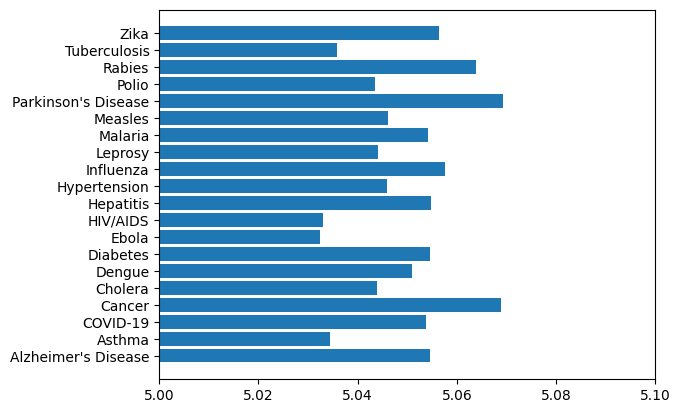

In [5]:
plt.barh(Disease_Mortality['Disease Name'], Disease_Mortality['Mortality Rate (%)'])
plt.xlim([5,5.1])
plt.show()

In [6]:
# 나라별 질병간 발생률
Country_Disease_Incidence = df.groupby(['Country','Disease Name'])[['Incidence Rate (%)']].mean().reset_index()
Country_Disease_Incidence  

,Country,Disease Name,Incidence Rate (%)
0,Argentina,Alzheimer's Disease,7.678997
1,Argentina,Asthma,7.513698
2,Argentina,COVID-19,7.629473
3,Argentina,Cancer,7.573536
4,Argentina,Cholera,7.513887
...,...,...,...
395,USA,Parkinson's Disease,7.670480
396,USA,Polio,7.549906
397,USA,Rabies,7.473230
398,USA,Tuberculosis,7.661737


In [7]:
df['Country'].nunique()

20

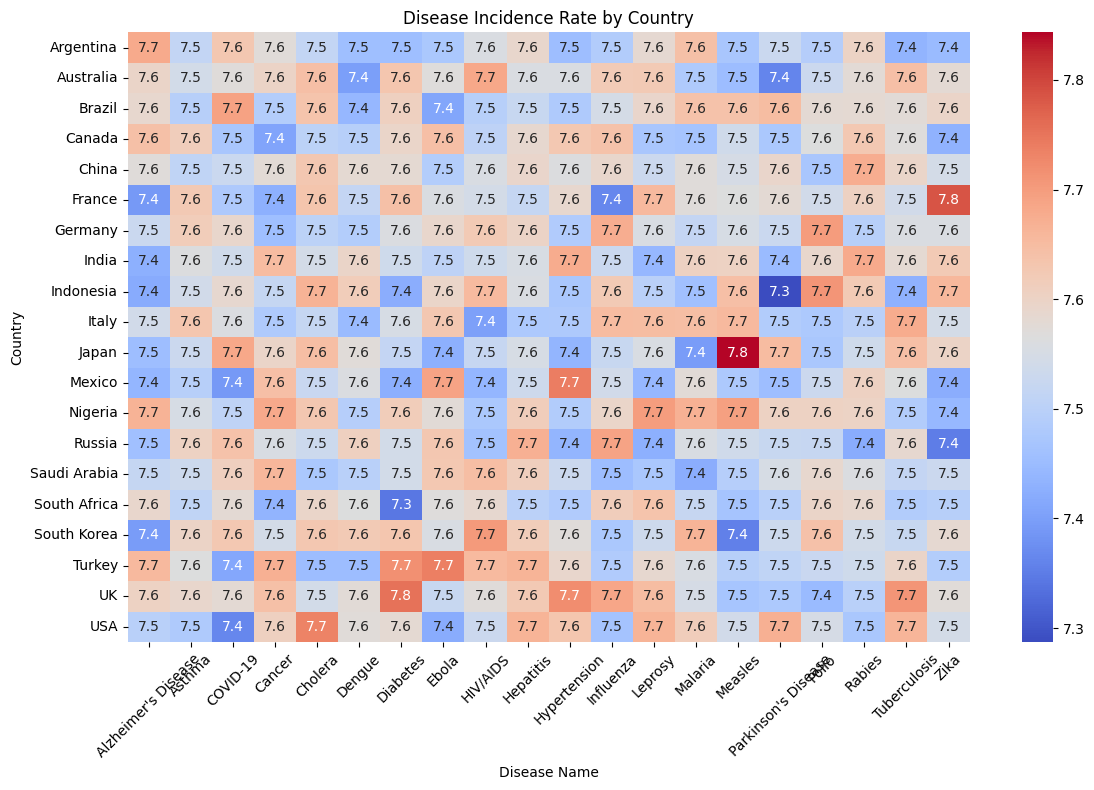

In [8]:
import seaborn as sns

# Pivot the data for a heatmap
heatmap_data = df.pivot_table(
    index='Country', columns='Disease Name', values='Incidence Rate (%)', aggfunc='mean'
)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Disease Incidence Rate by Country')
plt.ylabel('Country')
plt.xlabel('Disease Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# 연령별 질병 사망률
Age_Disease_Mortality = df.groupby(['Age Group','Disease Name'])[['Mortality Rate (%)']].mean().reset_index()
Age_Disease_Mortality

,Age Group,Disease Name,Mortality Rate (%)
0,0-18,Alzheimer's Disease,5.026497
1,0-18,Asthma,5.030282
2,0-18,COVID-19,5.055655
3,0-18,Cancer,5.090766
4,0-18,Cholera,5.044676
...,...,...,...
75,61+,Parkinson's Disease,5.072811
76,61+,Polio,5.037308
77,61+,Rabies,5.058692
78,61+,Tuberculosis,5.014000


In [10]:
df['Age Group']  # => 0-18 / 19-35 / 36-60/ 61+ 

0          0-18
1           61+
2         36-60
3          0-18
4           61+
          ...  
999995     0-18
999996     0-18
999997    19-35
999998      61+
999999    36-60
Name: Age Group, Length: 1000000, dtype: object

In [11]:
teen_age = Age_Disease_Mortality[Age_Disease_Mortality['Age Group'] == '0-18'] # => 0-18 / 19-35 / 36-60/ 61+ 
mid_age = Age_Disease_Mortality[Age_Disease_Mortality['Age Group'] == '19-35']
top_mid_age = Age_Disease_Mortality[Age_Disease_Mortality['Age Group'] == '36-60']
top_age = Age_Disease_Mortality[Age_Disease_Mortality['Age Group'] == '61+']

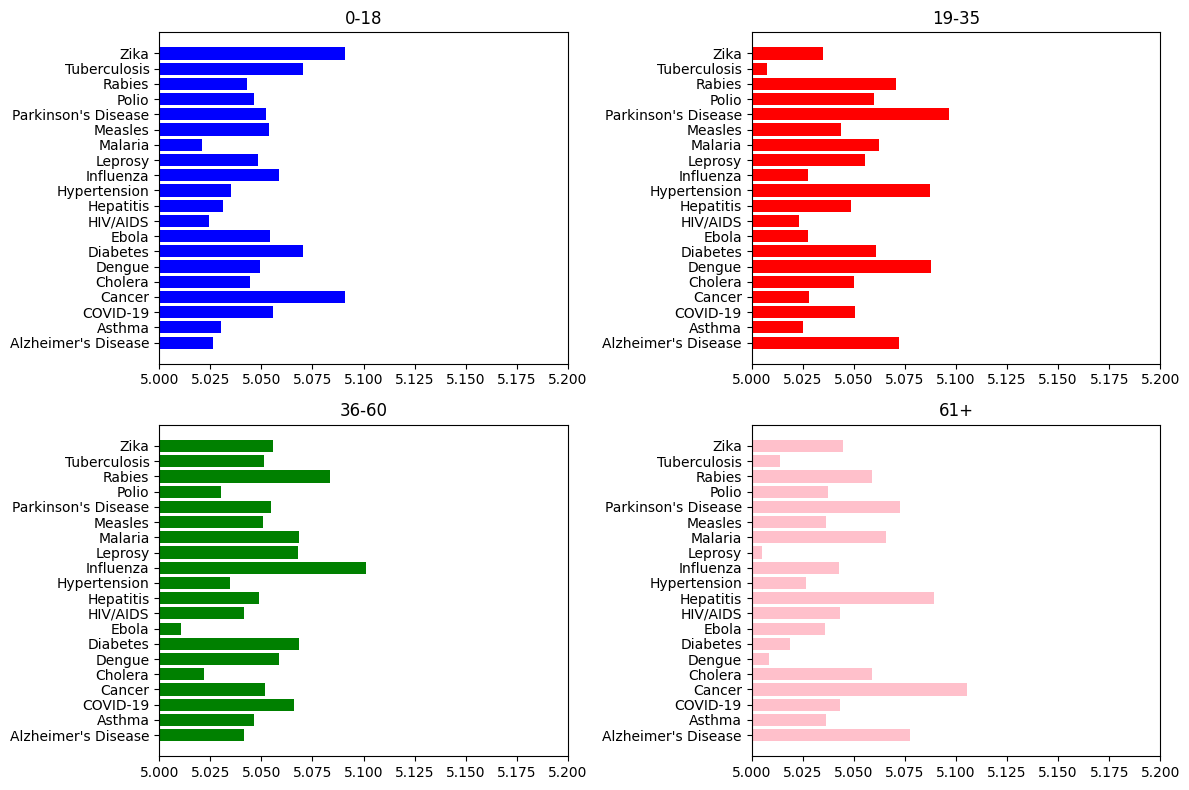

In [12]:

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.barh(teen_age['Disease Name'],teen_age['Mortality Rate (%)'],color='blue')
plt.xlim([5,5.2])
plt.title('0-18')

plt.subplot(2, 2, 2)
plt.barh(mid_age['Disease Name'],mid_age['Mortality Rate (%)'],color='red')
plt.xlim([5,5.2])
plt.title('19-35')

plt.subplot(2, 2, 3)
plt.barh(top_mid_age['Disease Name'],top_mid_age['Mortality Rate (%)'],color='green')
plt.xlim([5,5.2])
plt.title('36-60')

plt.subplot(2, 2, 4)
plt.barh(top_age['Disease Name'],top_age['Mortality Rate (%)'],color='pink')
plt.xlim([5,5.2])
plt.title('61+')

plt.tight_layout()
plt.show()

In [13]:
# 질병별 영향을 받은 인구 평균
Disease_Affected=df.groupby(['Disease Name'])[['Population Affected']].mean().reset_index()
Disease_Affected


,Disease Name,Population Affected
0,Alzheimer's Disease,502630.700179
1,Asthma,501698.711344
2,COVID-19,498343.797159
3,Cancer,501841.929601
4,Cholera,499253.053772
5,Dengue,499774.628646
6,Diabetes,501187.254078
7,Ebola,501187.364445
8,HIV/AIDS,499295.927915
9,Hepatitis,498384.387633


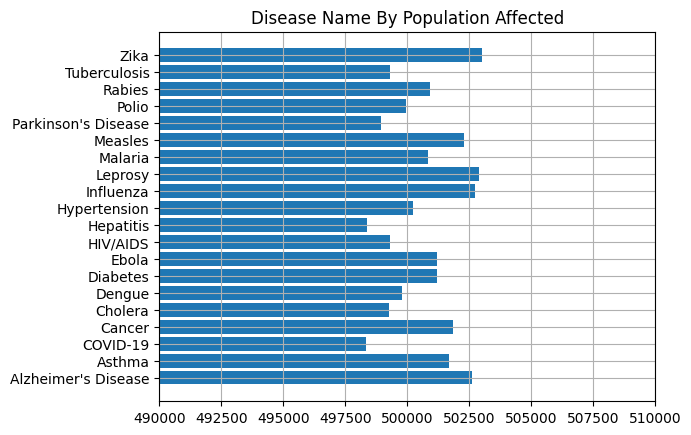

In [28]:
plt.grid(True)
plt.xlim(490000,510000)
plt.barh(Disease_Affected['Disease Name'], Disease_Affected['Population Affected'])
plt.title('Disease Name By Population Affected')
plt.show()